# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [35]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import seaborn as sns
from scipy import stats
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Evan\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


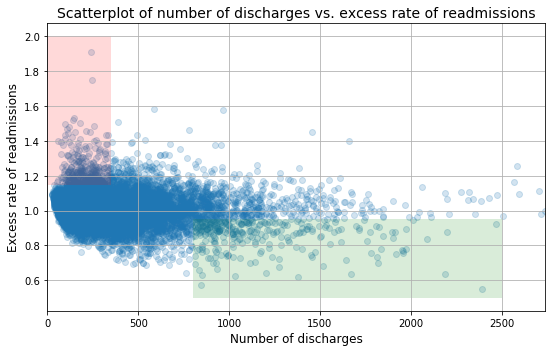

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [ ]:
# Your turn

# Do you agree with the above analysis and recommendations? Why or why not?
### The above analysis states that there is a statistically significant correlation between Number of Discharges and Excess Readmission Rate, without conducting a hypothesis test or reporting a p-value. Additionally, the above analysis makes policy recommendations without assessing the practical significance of the stated correlation. There may be more effective ways to address hospital readmission.

In [46]:
df = hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio']]

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 2 columns):
Number of Discharges        16860 non-null object
Excess Readmission Ratio    13731 non-null float64
dtypes: float64(1), object(1)
memory usage: 263.5+ KB


In [50]:
df = df[df['Number of Discharges'] != 'Not Available']

In [52]:
df['Number of Discharges'] = pd.to_numeric(df['Number of Discharges'])

In [53]:
df.dropna(axis=0, how='any', subset=['Excess Readmission Ratio'], inplace=True)

# B. Provide support for your arguments and your own recommendations with a statistically sound analysis:
## Setup an appropriate hypothesis test.
#### Null Hypothesis: Number of Discharges and Excess Readmission Ratio are completely uncorrelated
#### Alternate Hypothesis: There is a statistically significant correlation between Number of Discharges and Excess Readmission Ratio

In [55]:
observed_pearson = stats.pearsonr(df['Number of Discharges'], df['Excess Readmission Ratio'])
observed_pearson

(-0.09739794351079355, 1.222547377680967e-25)

#### Let's double check the p-value using a permutation. We will randomly permute the 'Number of Discharges' column and calculate it's correlation coefficient with 'Excess Readmission Ratio' 10000 times.

In [56]:
perm_replicates = np.empty(10000)

for i in range(10000):
    discharge_permuted = np.random.permutation(df['Number of Discharges'])
    
    perm_replicates[i] = stats.pearsonr(discharge_permuted, df['Excess Readmission Ratio'])[0]
    
p = np.sum(perm_replicates <= observed_pearson[0]) / len(perm_replicates)
print('p-value:', p)

p-value: 0.0


#### None of the 10000 replicated correlation coefficients were as extreme as the observed pearson correlation coefficient. Both methods yielded a p-value < 0.01, so we can therefor reject the null hypothesis that the two variables are completely uncorrelated.
#### Although the correlation is statistically significant, there is still the question of whether it is practically significant. In this case we find that about 10% of the variation in Excess Readmission Ratio is due to its correlation with Number of Discharges. Number of Discharges is an important factor to consider, but clearly it is not the whole story, as 90% of the variation in Excess Readmission Ratio is not explained by the Number of Discharges.
### Recommendations
#### Although the recommendations made above are likely to improve readmission rates, the benefits may be very small and at a very high cost. Without financial information this is impossible to tell. However, with the relatively small correlation coefficient found in the analysis, it is likely that there are other factors which have a greater influence on readmission rates, such as social and economic characteristics of the patients.

****
# Look at the scatterplot above. 
## What are the advantages and disadvantages of using this plot to convey information?
#### The advantages of this scatterplot are that you can display all data points on a single plot, and you can visually assess the correlation between the two.
#### Some disadvantages are that the highlighted regions are chosen arbitrarily and do not help to assess the true relationship between the variables. The scatterplot above also excludes data points with extreme x values. Additionally, with so many data points clustered at the left end of the x-axis, it is difficult to gather any meaningful information.
## Construct another plot that conveys the same information in a more direct manner.

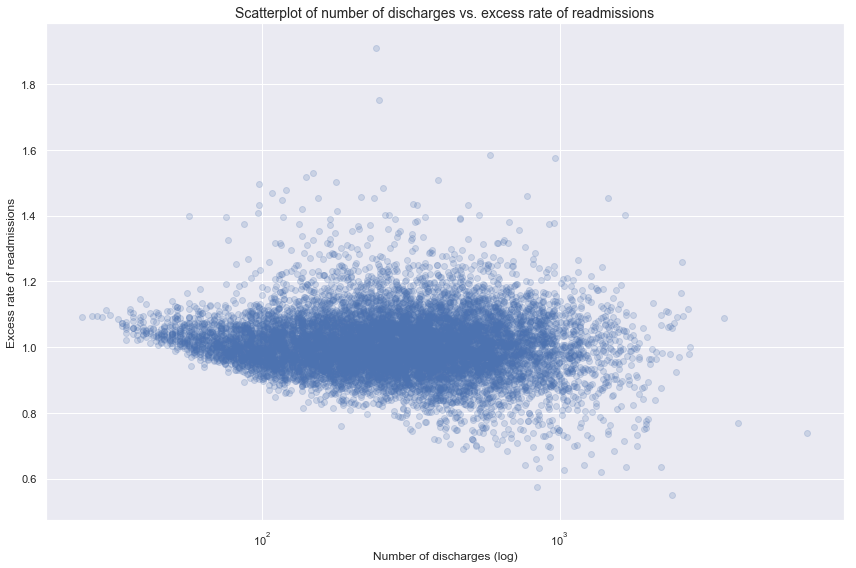

In [69]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in df['Number of Discharges']]
y = list(df['Excess Readmission Ratio'])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x, y, alpha=0.2)




ax.set_xscale('log')
ax.set_xlabel('Number of discharges (log)', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

## The above scatterplot displays all data points, while log scaling the x-axis so that the data points at the left end of the axis are more visible.